# Pymaceuticals Inc.
---

### Analysis


In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].value_counts()
num_mice = len(mice)
num_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean  = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
SEM = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary = pd.DataFrame({ "Turmor Volumn Mean":mean,
                        "Turmor Volumn Median": median,
                        "Turmor Volumn Variance": var,
                        "Turmor Volumn Standard Deviation": std,
                        "Turmor Volumn SEM": SEM
        
                        })

summary


,Turmor Volumn Mean,Turmor Volumn Median,Turmor Volumn Variance,Turmor Volumn Standard Deviation,Turmor Volumn SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [26]:
mice_count = combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()

Text(0.5, 1.0, 'Number of Mice per Treatment')

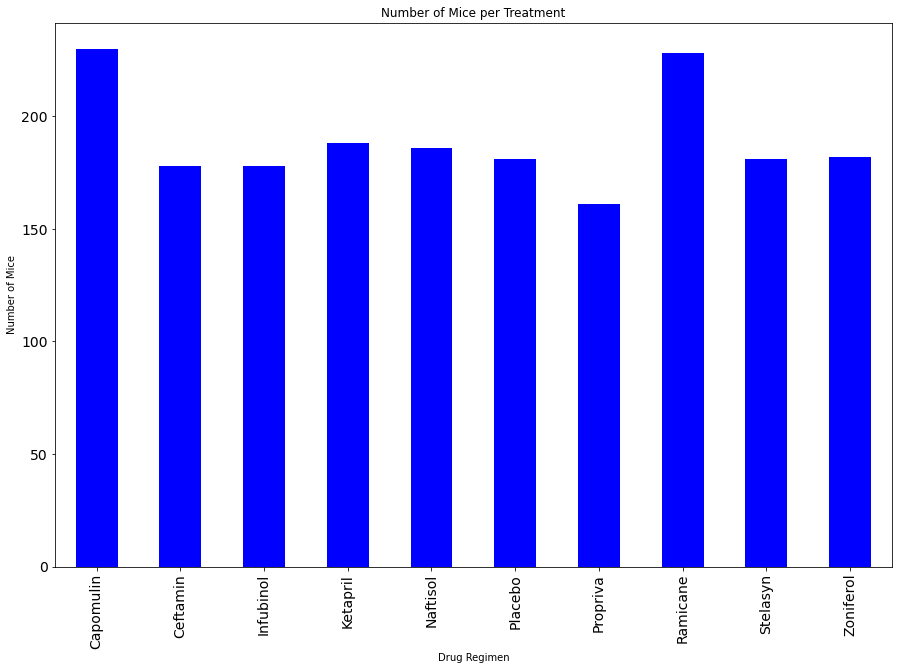

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

pandas_plot = mice_count.plot.bar(figsize=(15,10), color='b',fontsize = 14)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

Text(0, 0.5, 'Number of Mice')

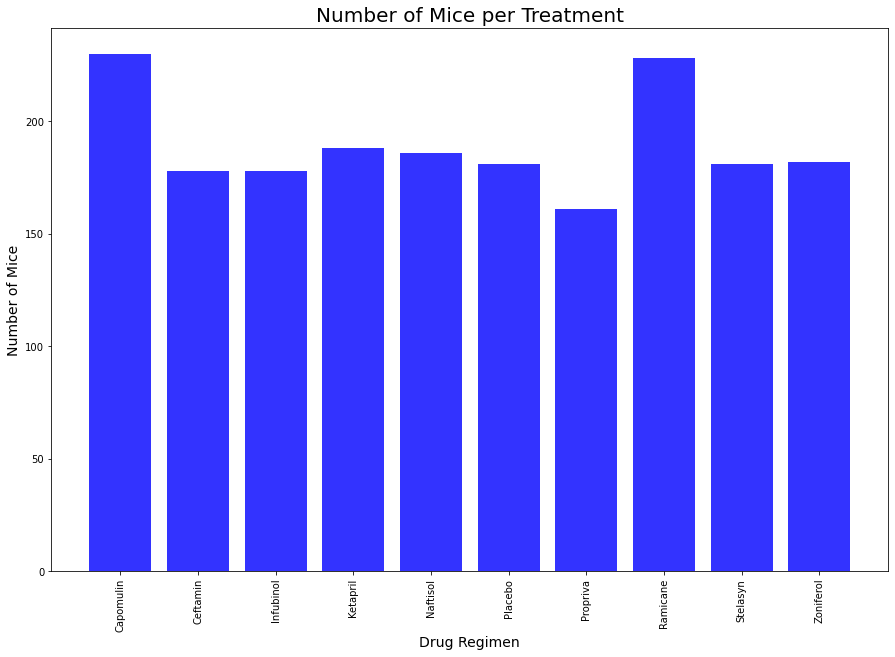

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(mice_count))

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_count, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

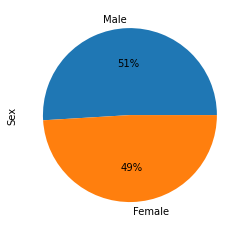

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data["Sex"].value_counts()
Sex = ["Male", "Female"]

gender.plot.pie( autopct="%1.0f%%")

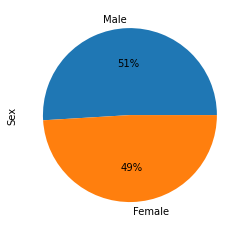

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_label = gender.index.values
count_value = gender.values
plt.ylabel("Sex")
plt.pie(count_value, labels = sex_label, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots


In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_data = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") | (clean_data["Drug Regimen"] == "Ramicane") |
                                        (clean_data["Drug Regimen"] == "Infubinol") |(clean_data["Drug Regimen"] == "Ceftamin") ]


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = reduced_data.groupby(["Drug Regimen","Mouse ID"]).last()
new_index = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
reduced_last =new_index[["Drug Regimen", "Tumor Volume (mm3)", "Mouse ID", "Weight (g)", "Timepoint"]]


capomulin_df = reduced_last.loc[reduced_last["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = reduced_last.loc[reduced_last["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = reduced_last.loc[reduced_last["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = reduced_last.loc[reduced_last["Drug Regimen"] == "Ceftamin"]
ceftamin_df

new_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

capomulin_df.head()


,Drug Regimen,Tumor Volume (mm3),Mouse ID,Weight (g),Timepoint
0,Capomulin,38.982878,b128,22,45
1,Capomulin,38.939633,b742,21,45
2,Capomulin,30.485985,f966,17,20
3,Capomulin,37.074024,g288,19,45
4,Capomulin,40.159220,g316,22,45


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [] 

for drug in reduced_last["Drug Regimen"]:
    if drug not in treatments:
        treatments.append(drug)
        
treatments

# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []
upper_list = []
lower_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = new_df[drug].quantile([0.25, 0.5, 0.75])
    upperq = quartiles[0.75]
    lowerq = quartiles[0.25]
    iqr = upperq- lowerq
    # add subset 
    upper_list.append(upperq)
    lower_list.append(lowerq)
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{drug}'s potiential outliers are values below {lower_bound} or values above {upper_bound}'")

Capomulin's potiential outliers are values below 26.714832162499995 or values above 55.9711007025'
Ceftamin's potiential outliers are values below 32.818911426250004 or values above 71.19095325625'
Infubinol's potiential outliers are values below 32.309217298749985 or values above 72.31757996875001'
Ramicane's potiential outliers are values below 24.18658646249998 or values above 57.48804812250001'


Text(0, 0.5, 'Final Tumor Volume (mm3)')

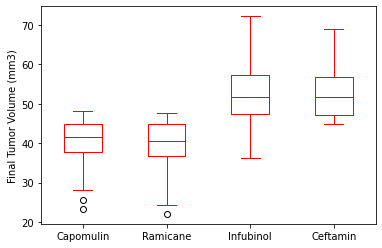

In [83]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = new_df.boxplot(grid = False, color = "red")
boxplot.set_ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots


Text(0, 0.5, 'Tumor Volume (mm3)')

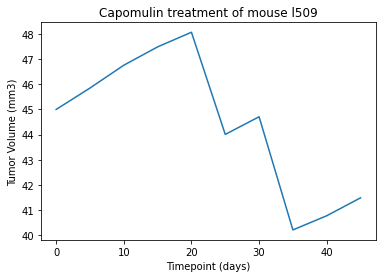

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_data.loc[ (clean_data["Mouse ID"] == "l509")]

x = capomulin["Timepoint"]
y = capomulin["Tumor Volume (mm3)"]

plt.plot(x,y)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

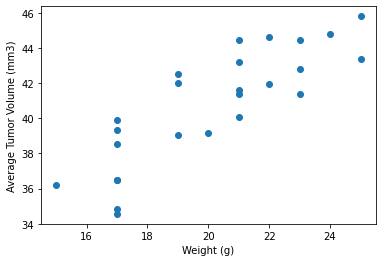

In [102]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]
group_cap_df = cap_df.groupby("Mouse ID")

avg_weight = group_cap_df["Weight (g)"].mean()
avg_tumor = group_cap_df["Tumor Volume (mm3)"].mean()

plt.scatter(avg_weight, avg_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression 

In [103]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


correlation = st.pearsonr(avg_weight, avg_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

coeff = st.linregress(avg_weight, avg_tumor)


The correlation between mouse weight and the average tumor volume is 0.84


In [104]:
coeff = st.linregress(avg_weight, avg_tumor)
coeff 


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [106]:
mslope = 0.9544396890241045
bintercept=21.552160532685015

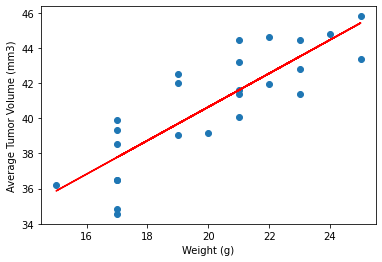

In [108]:
line = avg_weight*mslope+bintercept

plt.scatter(avg_weight, avg_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(avg_weight, line, color = "red")